In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import sys, os, cv2

In [13]:
directory = '/kaggle/input/ocr-dataset'
d_1 = os.path.join(directory, 'dataset')

In [14]:
dataset = keras.utils.image_dataset_from_directory(d_1, image_size=(60,40), batch_size=16)
dataset = dataset.map(lambda x,y: (x/255., y))

Found 210227 files belonging to 62 classes.


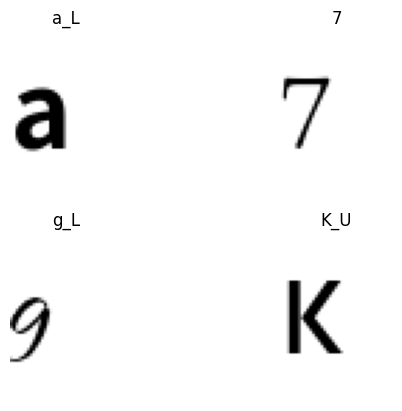

In [15]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A_U', 'B_U', 'C_U', 'D_U', 'E_U', 'F_U', 'G_U', 'H_U', 'I_U', 'J_U', 'K_U', 'L_U', 'M_U', 'N_U', 'O_U', 'P_U', 'Q_U', 'R_U', 'S_U', 'T_U', 'U_U', 'V_U', 'W_U', 'X_U', 'Y_U', 'Z_U', 'a_L', 'b_L', 'c_L', 'd_L', 'e_L', 'f_L', 'g_L', 'h_L', 'i_L', 'j_L', 'k_L', 'l_L', 'm_L', 'n_L', 'o_L', 'p_L', 'q_L', 'r_L', 's_L', 't_L', 'u_L', 'v_L', 'w_L', 'x_L', 'y_L', 'z_L']
#L for lower case and U for upper case
for image, labels in dataset.take(1):
    for i in range(1,5):
        plt.subplot(2,2,i)
        plt.imshow((image[i]))
        plt.title(classes[labels[i]])
        plt.axis('off')

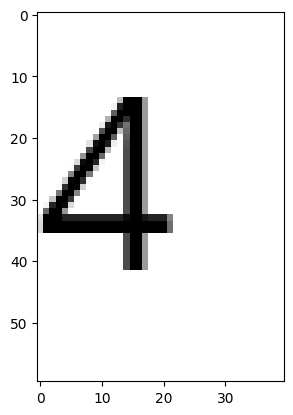

In [16]:
img = cv2.imread('/kaggle/input/ocr-dataset/dataset/4/100.png')
plt.imshow(img)

In [17]:
im = cv2.Canny(img, 50, 200) #better edge detection

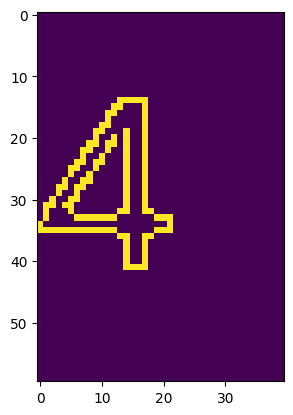

In [18]:
plt.imshow(im)

In [19]:
T_S = int(len(dataset)*.8)
training = dataset.take(T_S)
validation = dataset.skip(T_S)

In [20]:
model_OCR = keras.Sequential([
    keras.layers.Input(shape=(60,40,3)),
    keras.layers.Conv2D(5, (3,3), strides=1, activation='relu', padding='same'),
    keras.layers.Conv2D(120, (3,3), strides=1, activation='relu'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Conv2D(256, (3,3), strides=1, activation='relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(62, activation='softmax')
])

In [21]:
model_OCR.compile(loss='SparseCategoricalCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [26]:
model_OCR.fit(training, validation_data=validation, epochs=5, steps_per_epoch=750)
#can easily be trained longer for better metric-score

Epoch 1/5
750/750 [==============================] - 50s 67ms/step - loss: 0.3746 - accuracy: 0.8926 - val_loss: 0.4417 - val_accuracy: 0.8790
Epoch 2/5
750/750 [==============================] - 49s 66ms/step - loss: 0.3180 - accuracy: 0.9058 - val_loss: 0.4656 - val_accuracy: 0.8733
Epoch 3/5
750/750 [==============================] - 49s 65ms/step - loss: 0.3530 - accuracy: 0.8990 - val_loss: 0.4232 - val_accuracy: 0.8847
Epoch 4/5
750/750 [==============================] - 51s 68ms/step - loss: 0.3417 - accuracy: 0.9000 - val_loss: 0.4387 - val_accuracy: 0.8798
Epoch 5/5
750/750 [==============================] - 49s 65ms/step - loss: 0.4101 - accuracy: 0.8816 - val_loss: 0.4059 - val_accuracy: 0.8851


In [38]:
def return_pred(image):
    #image = cv2.resize(image, (40,60))
    image = tf.expand_dims(image, axis=0)
    return (classes[np.argmax(model_OCR(image))])


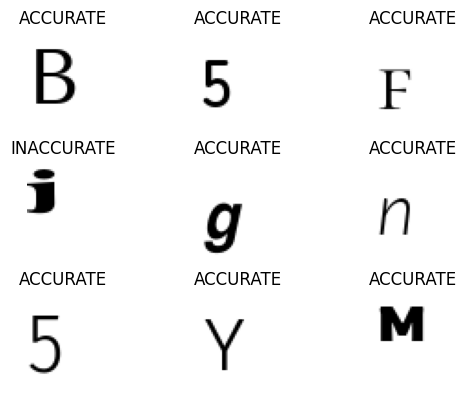

In [41]:
for image, label in training.take(1):
    for i in range(1,10):
        plt.subplot(3,3,i)
        plt.imshow(image[i])
        if return_pred(image[i]) == classes[label[i]]:
            plt.title('ACCURATE')
        else:
            plt.title('INACCURATE')
        plt.axis('off')

In [42]:
model_OCR.save('ocr-d.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
